In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal
import pandas as pd
from scipy import optimize,stats

In [2]:
#for infinite well potential
def matrix(n,v,L1,L2):#function returns the coeff of tridiagonal matrix
    h=(L2-L1)/(n-1)
    a=np.zeros((1,n-3))
    b=np.zeros((1,n-2))
    c=np.zeros((1,n-3))
    p=1/h**2
    for i in range(len(a)):
        a[i]=-p
        c[i]=-p
    for k in range(len(b)):
        b[k]=2*p+v
    return a[0],b[0],c[0]
cof=matrix(100,0,-1/2,1/2) #n=100 means 98 eignevalues and corresponding 

In [23]:
d =cof[1] 
e =cof[0] 
w, v = eigh_tridiagonal(d, e)#solvinf
W=w.tolist();V=v.tolist()

table=pd.DataFrame({"Eigenvalues":W,"eigenfunction":V})
#display(table)

In [4]:
def simpson(x,y):
    n=len(x)-1
    x = np.linspace(x[0],x[-1],n+1)
    I = (x[-1]-x[0])/(3*(n))*(y[0]+y[-1]+4*np.sum(y[1:n:2])+\
                           2*np.sum(y[2:n:2]))
    return I
f1=lambda N1,x:np.sqrt(2)*np.cos(N1*np.pi*x)
f2=lambda N2,x:np.sqrt(2)*np.sin(N2*np.pi*x)
f1_sq=lambda N1,x:2*(np.cos(N1*np.pi*x))**2
f2_sq=lambda N2,x:2*(np.sin(N2*np.pi*x))**2

In [5]:
#evaluating analytic valuem of eigenfunction for odd states

x=np.linspace(-0.5,0.5,98)
N1=[1,3,5,7,9]
Y_ODD=[];Y_ODD_sq=[]
for i in N1:
    y_odd=[f1(i,j) for j in x]
    y_odd_sq=[f1_sq(i,j) for j in x]
    Y_ODD.append(y_odd); Y_ODD_sq.append(y_odd_sq)
    
    
#evaluating analytic valuem of eigenfunction for even states
N1=[2,4,6,8,10]   
Y_EVEN=[];Y_EVEN_sq=[]
for i in N1:
    y_even=[f2(i,j) for j in x]
    y_even_sq=[f2_sq(i,j) for j in x]
    Y_EVEN.append(y_even);  Y_EVEN_sq.append(y_even_sq)


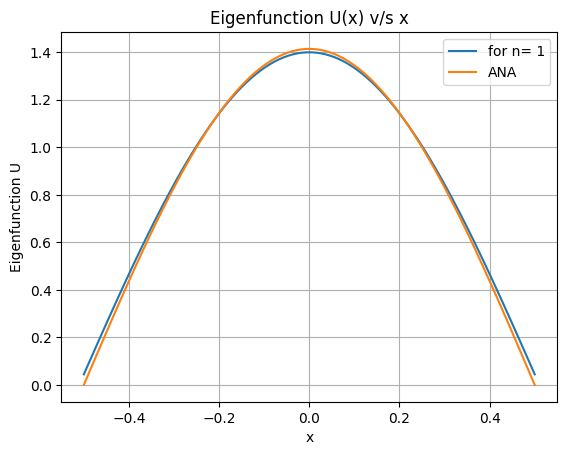

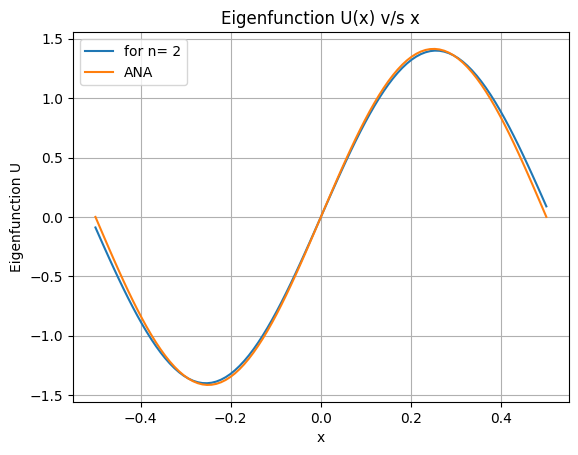

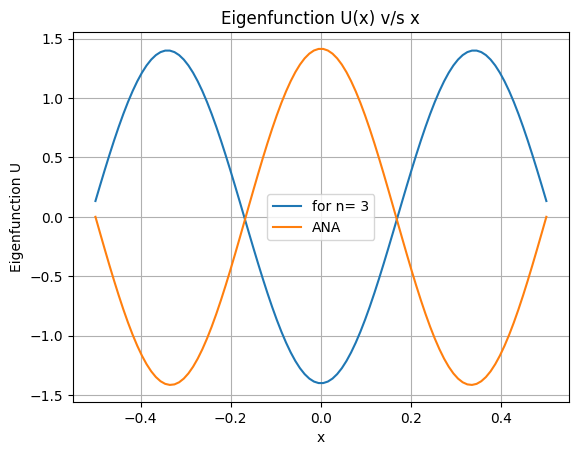

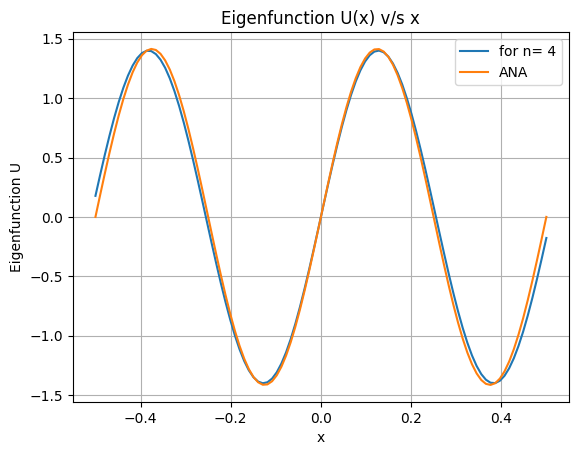

In [6]:
def norm(v):#function defined for normalization of U
    v_sq=v**2
    v_norm=v/np.sqrt(simpson(x,v_sq))
    return v_norm
VV=[Y_ODD[0],Y_EVEN[0],Y_ODD[1],Y_EVEN[1]]

for j in range(4): #ploting 4 values of eigenfunction U
    vo=v[:,j]
    sol=norm(vo)
    plt.figure()
    plt.plot(x,sol,label='for n= '+str(j+1))
    plt.plot(x,VV[j],label="ANA")
    plt.title("Eigenfunction U(x) v/s x")
    plt.xlabel("x")
    plt.ylabel("Eigenfunction U")
    plt.grid()
    plt.legend()
plt.show() 

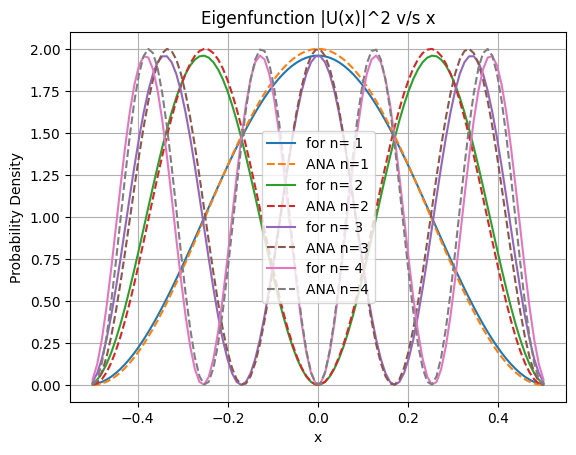

In [7]:
x=np.linspace(-0.5,0.5,98)
P_D=[Y_ODD_sq[0],Y_EVEN_sq[0],Y_ODD_sq[1],Y_EVEN_sq[1]]#evaluating probability density function
for j in range(4):
    vo=v[:,j]
    sol=norm(vo)
    v_sq=sol**2
    
    plt.plot(x,v_sq,label='for n= '+str(j+1))
    
    plt.plot(x,P_D[j],"--",label="ANA n="+str(j+1))
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.title("Eigenfunction |U(x)|^2 v/s x")
plt.grid()
plt.legend()
plt.show() 

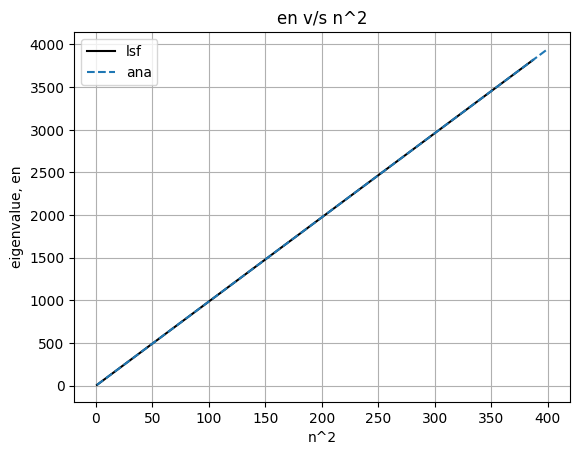

In [8]:
en=lambda N:N*np.pi**2  #analytic value of eigenvalue
En=w[0:20] #numerical value of eigenvalue
n_sq=np.array(En)/(np.pi**2)
#evaluating slope and intercept using lsf
slope, intercept, r, p, se = stats.linregress(n_sq, En )
YY=slope*n_sq+intercept
N_sq_ana=[]
for i in range(1,21):
    n=i**2
    N_sq_ana.append(n)
    
en_ana=[en(j) for j in N_sq_ana]    
plt.plot(n_sq,YY,color="black",label="lsf")  
plt.plot(N_sq_ana,en_ana,"--",label="ana")
plt.grid()
plt.xlabel("n^2")
plt.ylabel("eigenvalue, en")
plt.title("en v/s n^2")
plt.legend()
plt.show()


In [20]:
#L=5Angstrom
#evaluating analytic and numerical eigenvalues in eV
w1=w[0:10]
hc=197.3*10**(-9)
mc2_e=0.51*10**(6)
L1=5*10**(-10)
E_ev=(w1*(hc)**2)/(2*mc2_e*L1**2)
E_ana_ev=lambda k,L,mc2:(k**2*(np.pi**2)*hc**2)/(2*mc2*L**2)
k=np.linspace(1,10,10)
E_ana_ev1=[E_ana_ev(j,L1,mc2_e) for j in k]
table2=pd.DataFrame({"n":k,"Eigenvalue(ev)":E_ev,"Eigenvalue(ev)_ana":E_ana_ev1})
print("L=5 Angstrom")
display(table2)

L=5 Angstrom


,n,Eigenvalue(ev),Eigenvalue(ev)_ana
0,1.0,1.506528,1.506655
1,2.0,6.024596,6.026619
2,3.0,13.549654,13.559892
3,4.0,24.074126,24.106475
4,5.0,37.587413,37.666368
5,6.0,54.075910,54.239570
6,7.0,73.523013,73.826081
7,8.0,95.909142,96.425902
8,9.0,121.211755,122.039032
9,10.0,149.405374,150.665472


In [21]:
#electron L=10 Angstrom
L2=10**(-9)
E_ana_ev2=[E_ana_ev(j,L2,mc2_e) for j in k]
E_ev2=(w1*(hc)**2)/(2*mc2_e*L2**2)
table3=pd.DataFrame({"n":k,"Eigenvalue(ev)":E_ev2,"Eigenvalue(ev)_ana":E_ana_ev2})
print("L=10 Angstrom")
display(table3)

L=10 Angstrom


,n,Eigenvalue(ev),Eigenvalue(ev)_ana
0,1.0,0.376632,0.376664
1,2.0,1.506149,1.506655
2,3.0,3.387414,3.389973
3,4.0,6.018531,6.026619
4,5.0,9.396853,9.416592
5,6.0,13.518977,13.559892
6,7.0,18.380753,18.456520
7,8.0,23.977285,24.106475
8,9.0,30.302939,30.509758
9,10.0,37.351343,37.666368


In [22]:
#proton L=5fm
L3=5*10**(-15)
mc2_p=915*10**(6)
E_ana_ev3=[E_ana_ev(j,L3,mc2_p) for j in k]
E_ev3=(w1*(hc)**2)/(2*mc2_p*L3**2)
table4=pd.DataFrame({"n":k,"Eigenvalue(ev)":E_ev3,"Eigenvalue(ev)_ana":E_ana_ev3})
print("L=5fm")
display(table4)

L=5fm


,n,Eigenvalue(ev),Eigenvalue(ev)_ana
0,1.0,8.397043e+06,8.397748e+06
1,2.0,3.357972e+07,3.359099e+07
2,3.0,7.552266e+07,7.557973e+07
3,4.0,1.341837e+08,1.343640e+08
4,5.0,2.095036e+08,2.099437e+08
5,6.0,3.014067e+08,3.023189e+08
6,7.0,4.098004e+08,4.114896e+08
7,8.0,5.345755e+08,5.374558e+08
8,9.0,6.756065e+08,6.802176e+08
9,10.0,8.327513e+08,8.397748e+08


In [28]:
#uncertainity principle
vvv=v[:,0]**2
vv_norm=norm(v[:,0])
oo=vv_norm**2
#x
yyy1=oo*np.array(x)
yyy2=oo*np.array(x)**2
Exp_x=simpson(x,yyy1)
Exp_x_sq=simpson(x,yyy2)
std_x=np.sqrt(Exp_x_sq-(Exp_x**2))
print('Uncertainity in x=',std_x)
#p
h_cut=1.05*10**(-34)
L=10**(-10)
yyy3=((np.cos(np.pi*np.array(x))*np.sin(np.pi*np.array(x)))*2*h_cut)
Exp_p=simpson(x,yyy3)
yyy4=(((np.cos(np.pi*np.array(x)))**2)*2*h_cut**2)/L**2
Exp_p_sq=simpson(x,yyy4)
std_p=np.sqrt(Exp_p_sq-(Exp_p**2))
print('Uncertainity in p=',std_p)
print("sigma(X) . sigma(p)=",std_p*std_x)

Uncertainity in x= 0.1844670736511262
Uncertainity in p= 1.05e-24
sigma(X) . sigma(p)= 1.936904273336825e-25


In [27]:
x1=np.linspace(-1/4,1/4,1000)
Prob=simpson(x1,oo)
print("Probability of finding a particle [-1/4,1/4]=",Prob)

Probability of finding a particle [-1/4,1/4]= 0.04854986500087844
